<a href="https://colab.research.google.com/github/Selani-Indrapala/Logistic-Regression/blob/main/LogisticRegressionWeightUpdateProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [29]:
# Generate synthetic data
np.random.seed(0)
centers = [[ -5 , 0] , [0 , 1.5]]
X , y = make_blobs ( n_samples =1000 , centers = centers ,random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np.dot(X , transformation )


In [30]:
# Add a bias term to the feature matrix
X = np.c_[ np.ones(( X.shape [0] , 1) ) , X ]
# Initialize coefficients
W = np.zeros( X.shape[1])


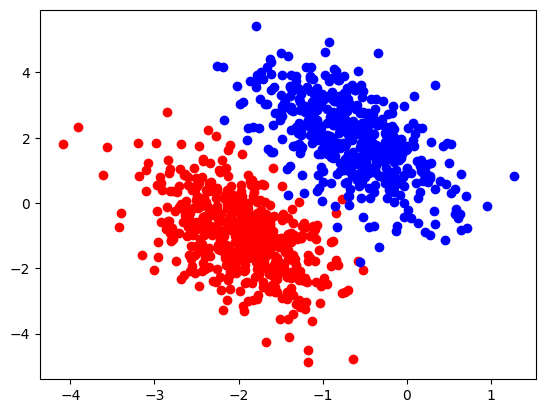

In [31]:
plt.scatter(X[y==0][:,1], X[y==0][:,2], color='red')
plt.scatter(X[y==1][:,1], X[y==1][:,2], color='blue')

In [32]:
# Define the logistic sigmoid function
def sigmoid ( z ) :
  return 1 / (1 + np.exp( - z ) )


In [33]:
# Define the logistic loss ( binary cross - entropy ) function
def log_loss( y_true , y_pred ) :
  epsilon = 1e-15
  y_pred = np.clip( y_pred , epsilon , 1 - epsilon ) # Clip to avoid log (0)
  return -(y_true*np.log(y_pred) + (1 - y_true)*np.log(1-y_pred ))

In [34]:
# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []

In [35]:
print('X shape: ',X.shape)
W = W.reshape(3,1)
print('W shape: ',W.shape)
print('y shape: ',y.shape)

X shape:  (1000, 3)
W shape:  (3, 1)
y shape:  (1000,)


In [36]:
def predict(X,W):
  return sigmoid(np.dot(X,W))

In [37]:
def loss_calc(y_pred,y):
  return np.mean(log_loss(y.reshape(y.shape[0],1),y_pred))

In [38]:
def gradient_descent(X,y,W,iterations,alpha,loss_history):
  y_pred = predict(X,W)
  loss_history.append(loss_calc(y_pred, y))
  N = X.shape[0]
  for i in range(iterations):
    diff = (sigmoid(np.dot(X, W)) - y.reshape(y.shape[0], 1))
    grad = np.dot(np.diag(diff.squeeze()), X)
    W = W - alpha/N * (np.transpose(np.dot(np.ones([1, grad.shape[0]]), grad)))

    y_pred = predict(X,W)
    loss_history.append(loss_calc(y_pred, y))
  return W


In [39]:
W = gradient_descent(X,y,W,iterations,learning_rate,loss_history)

Text(0, 0.5, 'Loss')

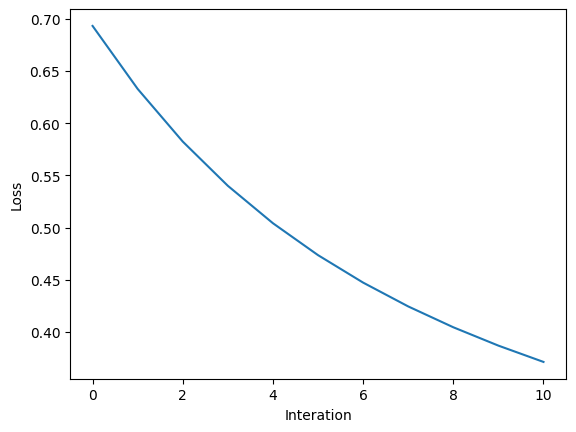

In [40]:
plt.plot(range(len(loss_history)),loss_history)
plt.xlabel("Interation")
plt.ylabel("Loss")

Newtons Method

In [41]:
interations = 10
loss_history2 = []
W = np.zeros([3,1])

In [42]:
def newtons(X,y,W,iterations,loss_history):
  y_pred = predict(X,W)
  loss_history.append(loss_calc(y_pred, y))
  N = X.shape[0]
  for i in range(iterations):
    diff = (sigmoid(np.dot(X, W)) - y.reshape(y.shape[0], 1))
    grad = np.dot(np.diag(diff.squeeze()), X)
    sum = (np.transpose(np.dot(np.ones([1, grad.shape[0]]), grad)))
    S = np.diag(np.multiply((sigmoid(np.dot(X, W)) - y.reshape(y.shape[0],1)), (1-sigmoid(np.dot(X,W))-y.reshape(y.shape[0],1))).squeeze())

    H = (1/N)*(np.dot(np.dot(np.transpose(X), S), X))
    inverse_H = np.linalg.inv(H)

    W = W - np.dot(inverse_H, ((1/N)*sum))

    y_pred = predict(X,W)
    loss_history.append(loss_calc(y_pred, y))
  return W

In [43]:
W = newtons(X, y, W, interations, loss_history2)

Text(0, 0.5, 'Loss')

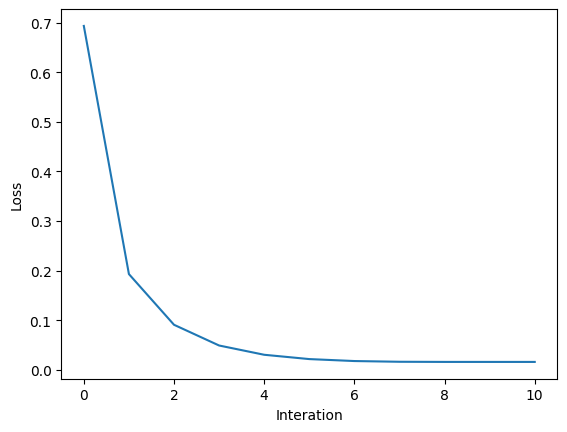

In [44]:
plt.plot(range(len(loss_history2)),loss_history2)
plt.xlabel("Interation")
plt.ylabel("Loss")

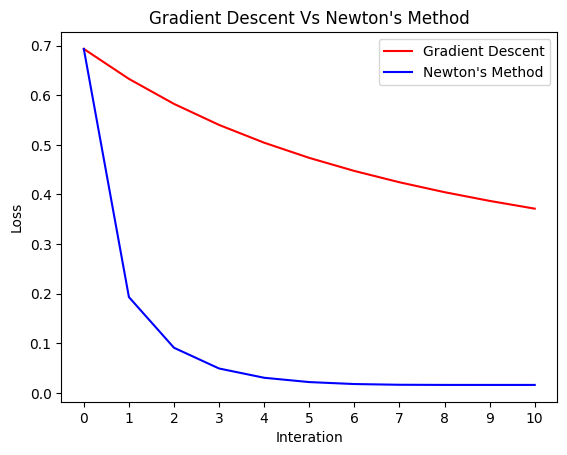

In [46]:
plt.plot(range(len(loss_history)), loss_history, color="red", label="Gradient Descent")
plt.plot(range(len(loss_history2)), loss_history2, color="blue", label="Newton's Method")
plt.xticks(range(len(loss_history)))
plt.title("Gradient Descent Vs Newton's Method")
plt.xlabel("Interation")
plt.ylabel("Loss")
plt.legend()